#**Principal Component Analysis**#

**Goal:**

- Reduce dimensional of a d-dimensional dataset by projecting it onto a k-dimensional reduced dimensional subspace (k < d)
- Standardize data
<br><br>

**Steps:**

1.   Importing Libraries
2.   Importing Dataset
3.   Data Pre-processing
4.   Data Standardization
5.   PCA projection
6.   Score Scatter Plot
7.   Score Line Plot
8.   Export PCA data to Excel

**An Oversimplified Process Illustration:** 


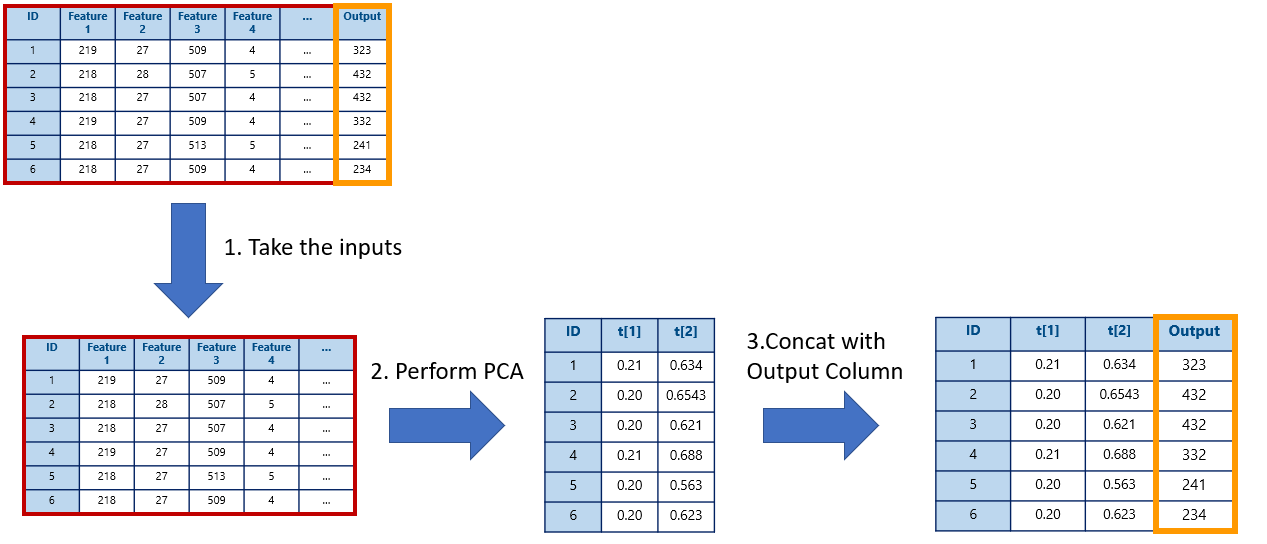


## Step 1: Importing Libraries

Important Libraries and Modules:
- Numpy (array)
- pandas (DataFrame, manipulating data)
- Matplotlib & Seaborn (Visualization)
- Scikit-Learn (PCA and Feature Scaling)

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Step 2: Importing Dataset

In [ ]:
'''
[MOUNT GOOGLE DRIVE]

- This is for enabling access to Google Drive
- Or you can just click on the Folder icon on the side bar and click on the Google Drive Icon
- You can also just upload the data file straight away by click on the "Upload to session storage" to upload from PC Physical Drive but this is not
  recommended because after 90 minutes the Runtime Terminates and once we restart the session, the uploaded file will be gone
'''

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
'''
[DATA GENERAL OVERVIEW]

This is where you list the useful insights from the data for pre-processing reference

- Unwanted Column             : 'MG3_UCOfeed_Flowrate','MG3_PFU_Vacuum'
- Date_time                   : [:,1]
- Input Range (X)             : [:,2:52]
- PV Range (X)                : [:,2:32]
- Class                       : [:,53]
- MG3_LBO_KV100 (Y)           : [:,52]
'''


#Importing Dataset from Google Drive
df = pd.read_excel('/content/drive/MyDrive/00 MACHINE LEARNING/MG3 Transition Analysis/Dataset - Dataset_MG3_hourly_ID_Segregated.xlsx', sheet_name='Transition B (2-3)')


## Step 3: Data Pre-processing

Ensure that the dataset:

- has only the required data/values/columns
- has no missing values
- if missing data is present, substitute it with values (previous cell value/median/average)
- separate features (X) and dependant variables (y)

### Pre-process 1 : Removing Unwanted Column(s)<br>

sample code:
```
data_frame = data_frame.drop(['column_name1','column_name2','...','column_nameN'], axis=1)
```

- If this code registers an error, it means the columns has been removed
- axis = 1 refers to y-axis



In [ ]:
df = df.drop(['MG3_UCOfeed_Flowrate','MG3_PFU_Vacuum'],axis=1)

### Pre-process 2 : Extracting Features and Dependant Variables

In [ ]:
'''
[DESCRITPTION]

x         : Process Variables                             -   this dataset will be projected to PCA
y         : MG3_LBO_KV100 (dependant variable)            -   this will be used to concat (combine) the output column with the PCA column in Step 5
features  : name of columns in dataframe
date      : Date_time
'''


x         =   df.iloc[:,2:32]
y         =   df.loc[:,['MG3_LBO_KV100']]
features  =   df.columns
date      =   df.loc[:,'Date_time']
class_df  =   df.loc[:,'CLASS']

### Pre-process 3 : Identify and Deal with Missing/Dirty Data

In [ ]:
'''
[Section 1 : Identify Column contain NaN]
'''


print("NaN Present: ",x.isnull().values.any())      # Returns True if NaN is present in the data 'x'
count_nan_in_x = x.isnull().sum()                   # Count how many NaN in a particular column

if (x.isnull().values.any() == True):               # If the data 'x' contain missing value is TRUE, print...
  print("NaN Content\n")                            # ... out columns and sum of missing data
  print(count_nan_in_x)
  print("\n Total NaN: ",x.isnull().sum().sum())
else:
    print("No NaN present")                         # if no missing data, print out "No NaN present"

In [ ]:
'''
[Section 2 : Replace NaN with value]
'''

x['MG3_PD_TopPA'].fillna(x['MG3_PD_TopPA'].median(),inplace=True)         # replace all NaN in column with median

In [ ]:
'''
[Section 3 : Confirmation]

- Ensure the outcome is:
    NaN Present:  False
    No NaN present

- If not, back to Section 2 to remove/replace any remaining NaN

'''

print("NaN Present: ",x.isnull().values.any())
count_nan_in_x = x.isnull().sum()

if (x.isnull().values.any() == True):
  print("NaN Content\n")
  print(count_nan_in_x)
  print("\n Total NaN: ",x.isnull().sum().sum())
else:
    print("No NaN present")

NaN Present:  False
No NaN present


## Step 4: Data Standardization (Feature Scaling)

- A process to normalize or standardize the range of data<br><br>
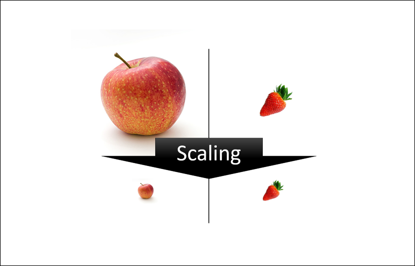

<br>
<br>

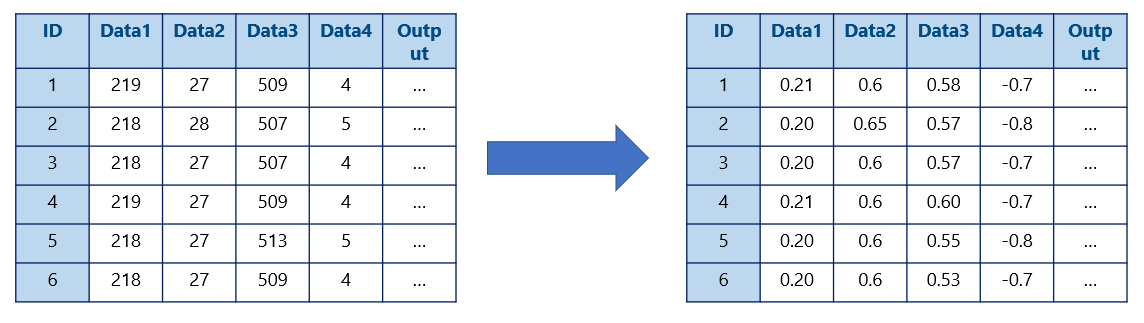

In [ ]:
# Standardizing Process Variables (x)
x = StandardScaler().fit_transform(x)

# Reassing the Standardized Process Variables (x) as Pandas Data Frame
x = pd.DataFrame(data = x, columns = features[2:32])

## Step 5: PCA Projection into 2-Dimensional Components

In [ ]:
pca = PCA(n_components=2)                                                                 # Define PCA model and state the number of components
principalComponents = pca.fit_transform(x)                                                # Perform PCA to data 'x'

principalDF = pd.DataFrame(data = principalComponents, columns = ['t[1]', 't[2]'])        # Compile the principal components into a DataFrame

In [ ]:
#View the DataFrame:
principalDF

In [ ]:
'''
[Concatenate necessary data for visualization in Step 6 and 7]
'''

for i in range(len(principalDF)):
  principalDF.iloc[i,1] = principalDF.iloc[i,1]*-1                                        # multiply all principal compoenets with -1

gen_list = pd.concat([date,class_df,principalDF,y],axis = 1)                              # concatenante necessary columns for visualization

In [ ]:
# View the DataFrame:
gen_list.head()

## Step 6: Plotting Scores Scatter Plot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


(-15.0, 15.0)

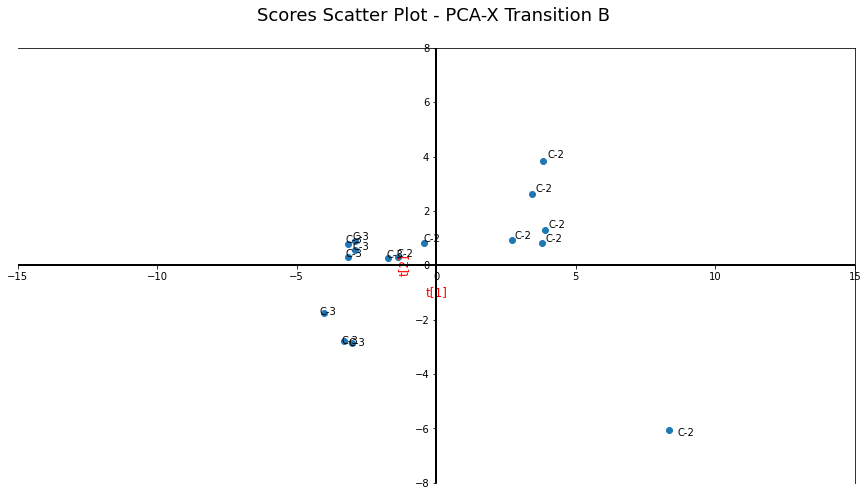

In [ ]:
# Define t[1] and t[2] variables
t1 = principalDF.iloc[:,0]
t2 = principalDF.iloc[:,1]


# Developing Scatter Plot
fig = plt.figure(figsize=(15,8))
plt.scatter(t1,t2)


# Centralise the Axis to make comparison with plot in SIMCA much more convenient
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
plt.axhline(y=0, ls='-', c='black',lw=2)
plt.axvline(x=0, ls='-', c='black',lw=2)

# Label the markers with CLASS type
for i in range(len(gen_list)):
    plt.annotate(str(class_df[i]),
                 (t1[i], t2[i]),
                 textcoords = 'offset pixels')

# Format the axis label
plt.title("Scores Scatter Plot - PCA-X Transition B \n",fontsize = 18)
plt.xlabel("t[1]",c='red',fontsize = 12)
plt.ylabel("t[2]",c='red',fontsize = 12)

# Set axis limit
plt.ylim((-8,8))
plt.xlim((-15,15))


## Step 7: Plotting Scores Line Plot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


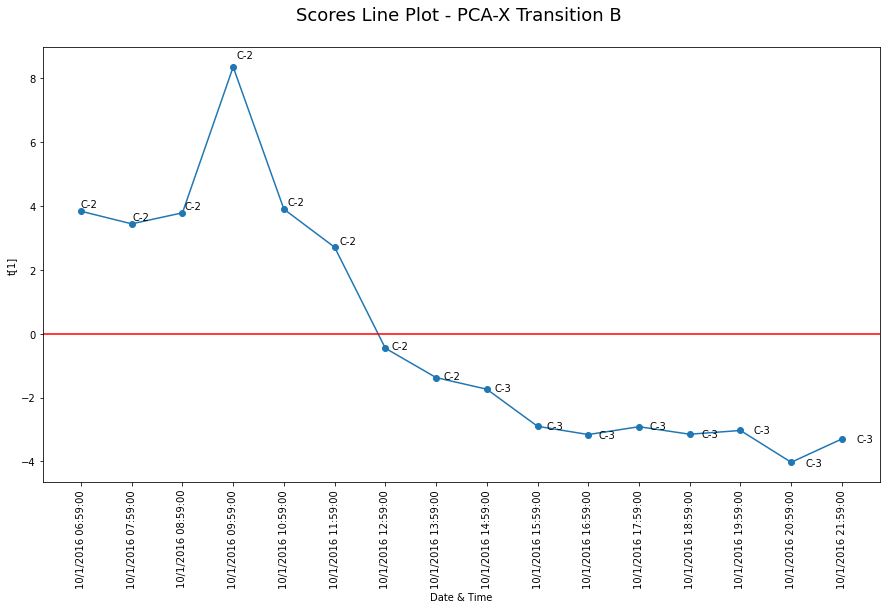

In [ ]:
# Develop Scores Line Plot where t[1] vs. Date_time
plt.figure(figsize=(15,8))
plt.plot(date,t1,"o-")
plt.title("Scores Line Plot - PCA-X Transition B \n",fontsize = 18)
plt.xticks(rotation=90)

# Format Axis Label
plt.xlabel("Date & Time")
plt.ylabel("t[1]")

# Set boundary line
plt.axhline(y=0, ls='-', c='red')


# Label the markers with CLASS type
for i in range(len(gen_list)):
    plt.annotate(str(class_df[i]), (date[i], t1[i]),textcoords = 'offset pixels')


## Step 8 Export to Excel

In [ ]:
gen_list.to_excel('t[3].xlsx')